In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import math

In [2]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import InputLayer, Input
from tensorflow.python.keras.layers import Reshape, MaxPooling2D
from tensorflow.python.keras.layers import Conv2D, Dense, Flatten

In [7]:
tf.__version__

'1.4.0'

In [8]:
tf.keras.__version__

'2.0.8-tf'

In [10]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets('C:/Users/Aman Deep Singh/Documents/Python/Data/MNIST/data', one_hot=True)

Extracting C:/Users/Aman Deep Singh/Documents/Python/Data/MNIST/data\train-images-idx3-ubyte.gz
Extracting C:/Users/Aman Deep Singh/Documents/Python/Data/MNIST/data\train-labels-idx1-ubyte.gz
Extracting C:/Users/Aman Deep Singh/Documents/Python/Data/MNIST/data\t10k-images-idx3-ubyte.gz
Extracting C:/Users/Aman Deep Singh/Documents/Python/Data/MNIST/data\t10k-labels-idx1-ubyte.gz


In [11]:
print("Size of:")
print("- Training-set:\t\t{}".format(len(data.train.labels)))
print("- Test-set:\t\t{}".format(len(data.test.labels)))
print("- Validation-set:\t{}".format(len(data.validation.labels)))

Size of:
- Training-set:		55000
- Test-set:		10000
- Validation-set:	5000


In [12]:
data.test.cls = np.argmax(data.test.labels, axis=1)

In [13]:
img_size = 28
img_size_flat = img_size * img_size
img_shape = (img_size, img_size)
img_shape_full = (img_size, img_size, 1)
num_channels = 1
num_classes = 10

In [26]:
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i].reshape(img_shape), cmap='binary')
        if cls_pred is None:
            xlabel = f'True: {cls_true[i]}'
        else:
            xlabel = f'True: {cls_true[i]}, Pred: {cls_pred[i]}'
        ax.set_xlabel(xlabel)
        
        ax.set_xticks([])
        ax.set_yticks([])
        
    plt.show()

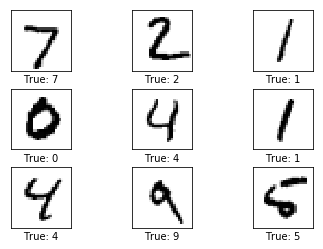

In [15]:
images = data.test.images[0:9]
cls_true = data.test.cls[0:9]
plot_images(images=images, cls_true=cls_true)

In [16]:
def plot_example_errors(cls_pred):
    incorrect = (cls_pred != data.test.cls)
    images = data.test.images[incorrect]
    cls_pred = cls_pred[incorrect]
    cls_true = data.test.cls[incorrect]
    plot_images(images=images[0:9], cls_true=cls_true[0:9], cls_pred=cls_pred[0:9])

In [17]:
# Prettytensor implementation
if False:
    x_pretty = pt.wrap(x_image)
    
    with pt.defaults_scope(activation_fn=tf.nn.relu):
        y_pred, loss = x_pretty \
            .conv2d(kernel=5, depth=16, name='layer_conv1') \
            .max_pool(kernel=2, stride=2) \
            .conv2d(kernel=5, depth=36, name='layer_conv2') \
            .max_pool(kernel=2, stride=2) \
            .flatten() \
            .fully_connected(size=128, name='layer_fc1') \
            .softmax_classifier(num_classes=num_classes, labels=y_true)

In [18]:
# Sequential
model = Sequential()
model.add(InputLayer(input_shape=(img_size_flat,)))
model.add(Reshape(img_shape_full))
model.add(Conv2D(kernel_size=5, strides=1, filters=16, padding='same', activation='relu', name='layer_conv1'))
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(Conv2D(kernel_size=5, strides=1, filters=36, padding='same', activation='relu', name='layer_conv2'))
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [19]:
from tensorflow.python.keras.optimizers import Adam
optimizer = Adam(lr=1e-3)

In [20]:
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
model.fit(x=data.train.images, y=data.train.labels, epochs=1, batch_size=128)

Epoch 1/1
55000/55000 [==============================] - 113s - loss: 0.2171 - acc: 0.9358   


In [22]:
result = model.evaluate(x=data.test.images, y=data.test.labels)

 9952/10000 [============================>.] - ETA: 0s

In [23]:
for name, value in zip(model.metrics_names, result):
    print(name, value)

loss 0.0533278594775
acc 0.9825


In [24]:
print(f'{model.metrics_names[1]}: {result[1]:.2%}')

acc: 98.25%


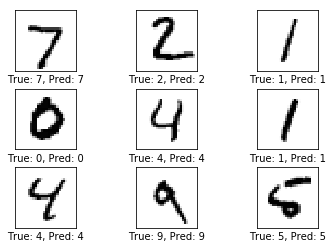

In [27]:
# prediction
images = data.test.images[0:9]
cls_true = data.test.cls[0:9]
y_pred = model.predict(x=images)
cls_pred = np.argmax(y_pred, axis=1)
plot_images(images=images, cls_true=cls_true, cls_pred=cls_pred)

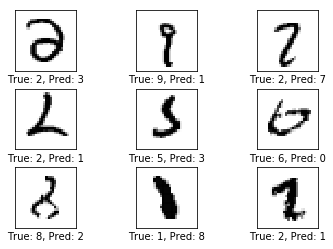

In [28]:
# mis-classified images
y_pred = model.predict(x=data.test.images)
cls_pred = np.argmax(y_pred, axis=1)
plot_example_errors(cls_pred)

In [29]:
# Keras API Functional model
inputs = Input(shape=(img_size_flat,))

net = inputs
net = Reshape(img_shape_full)(net)
net = Conv2D(kernel_size=5, strides=1, filters=16, padding='same', activation='relu', name='layer_conv1')(net)
net = MaxPooling2D(pool_size=2, strides=2)(net)
net = Conv2D(kernel_size=5, strides=1, filters=36, padding='same', activation='relu', name='layer_conv2')(net)
net = MaxPooling2D(pool_size=2, strides=2)(net)
net = Flatten()(net)
net = Dense(128, activation='relu')(net)
net = Dense(num_classes, activation='softmax')(net)
outputs = net

In [30]:
from tensorflow.python.keras.models import Model

In [31]:
model2 = Model(inputs=inputs, outputs=outputs)
model2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])